In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

<ipython-input-2-ca75ca9d6ff6>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch 
import io 

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


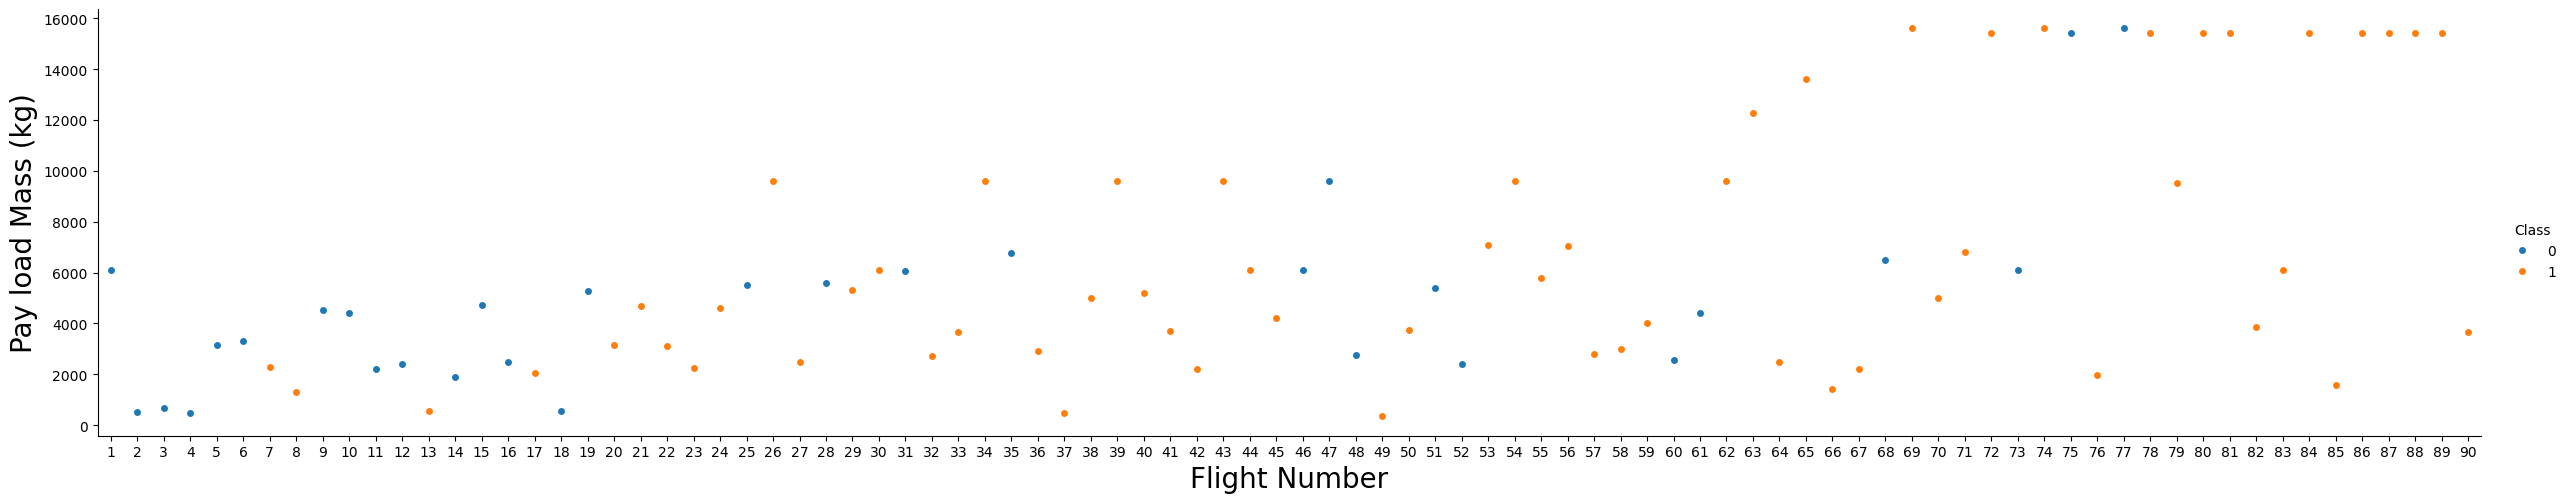

In [14]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show()

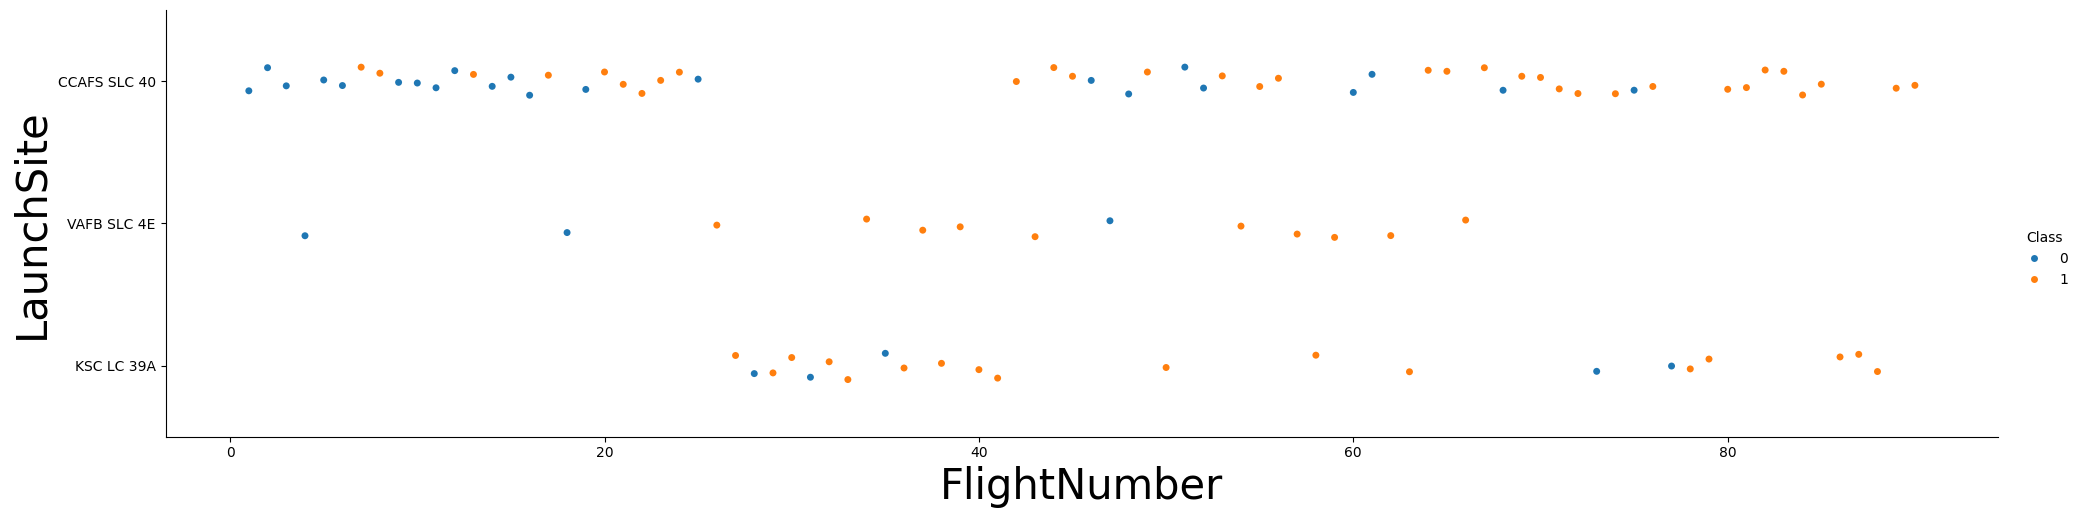

In [12]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("FlightNumber", fontsize = 30)
plt.ylabel("LaunchSite", fontsize = 30)
plt.show()

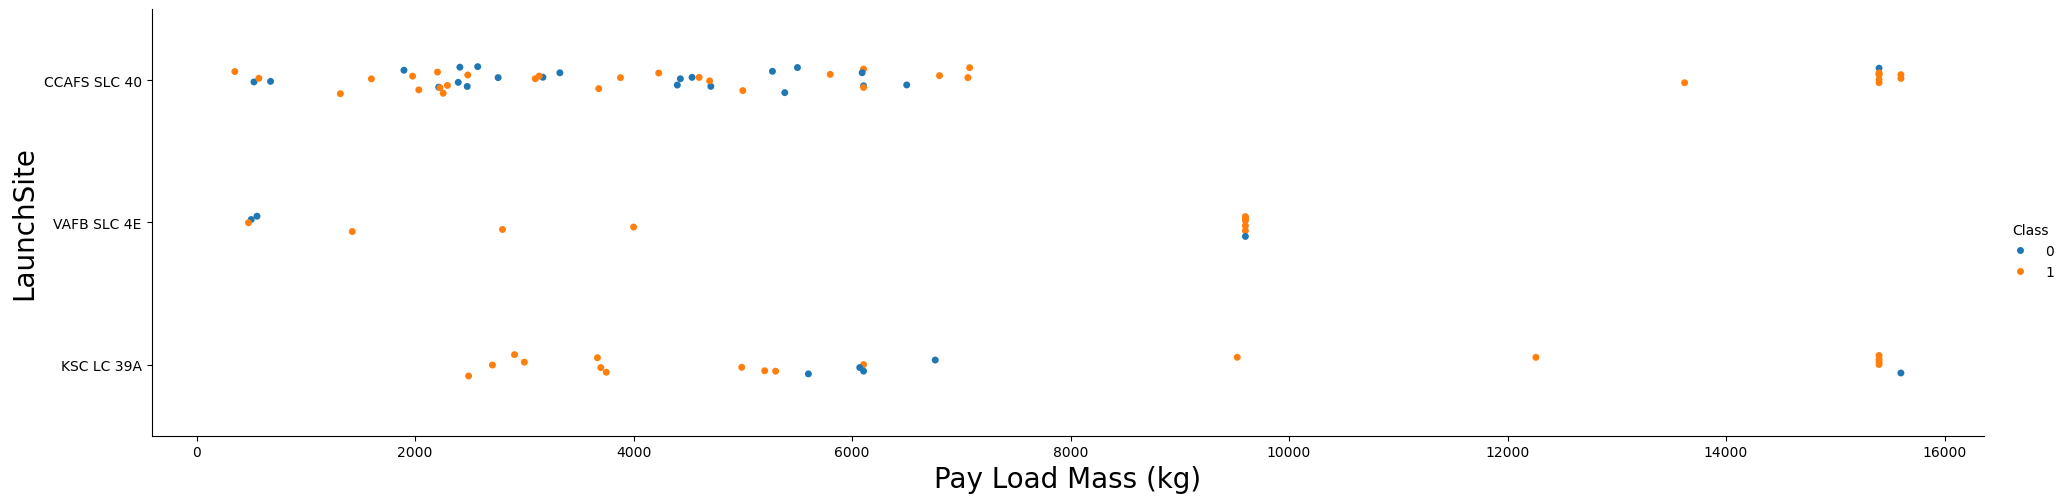

In [11]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 4)
plt.xlabel("Pay Load Mass (kg)", fontsize = 20)
plt.ylabel("LaunchSite", fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

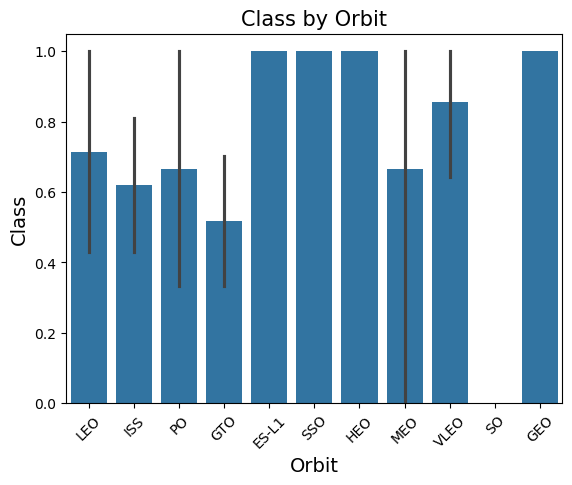

In [16]:
sns.barplot( y="Class", x="Orbit", data=df)
plt.xlabel("Orbit", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.title("Class by Orbit", fontsize=15)
plt.xticks(rotation=45)
plt.show

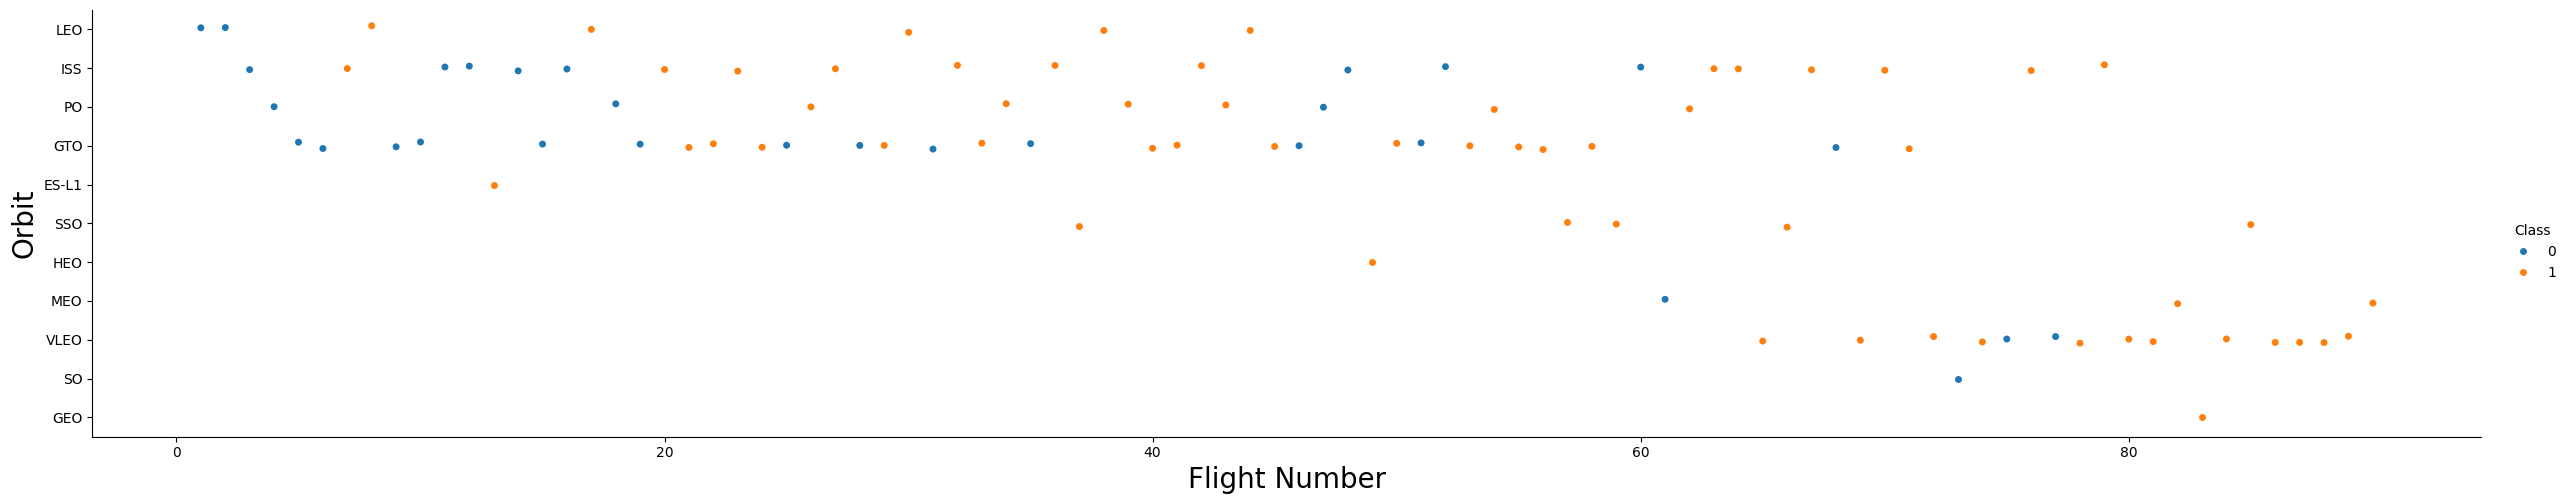

In [21]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

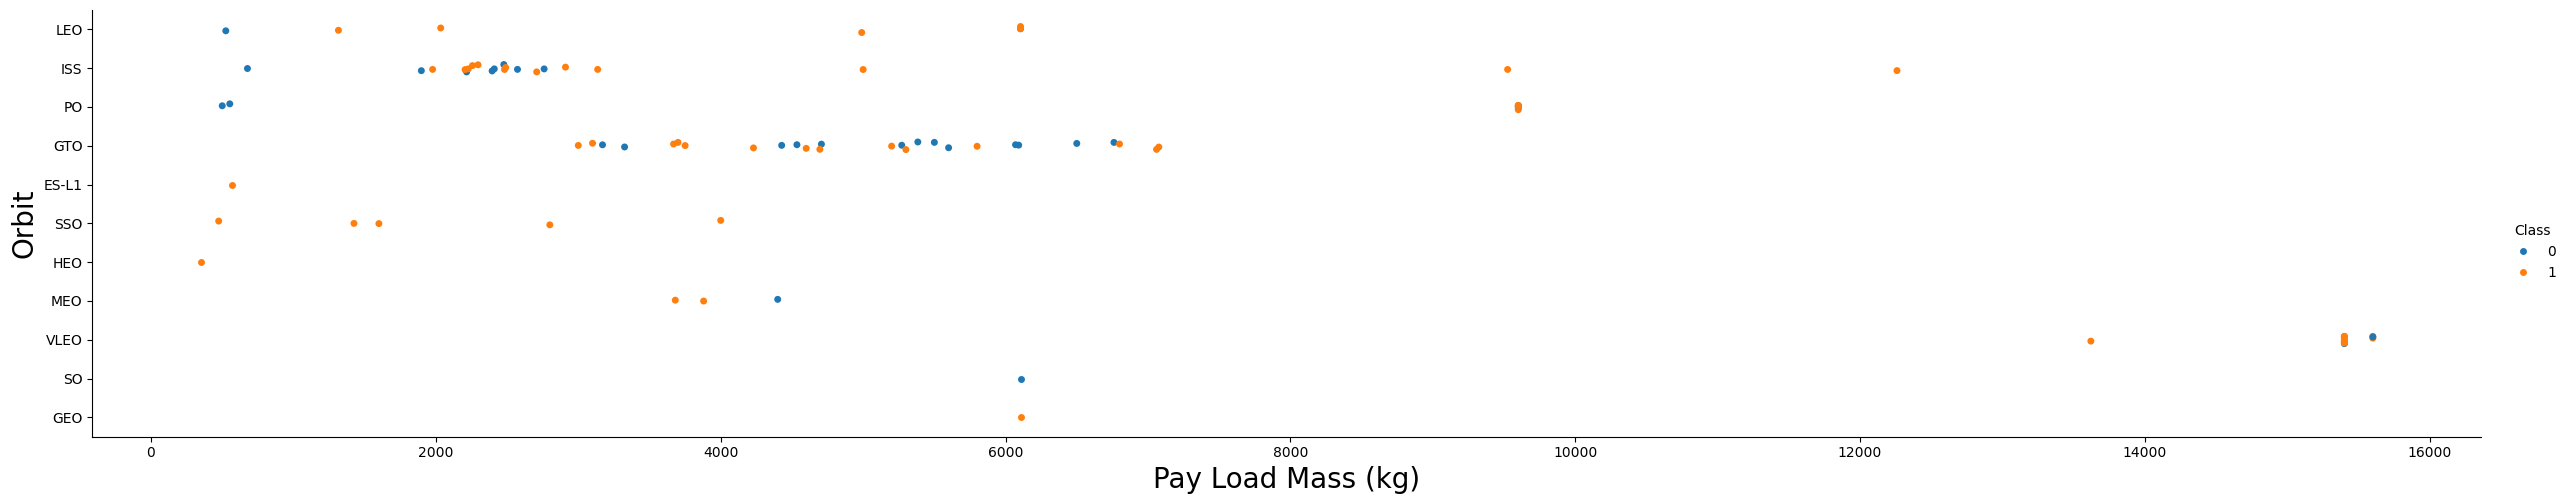

In [24]:
sns.catplot(y="Orbit", x="PayloadMass", hue = "Class", data=df, aspect = 5)
plt.xlabel("Pay Load Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

In [26]:
year =[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Year'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


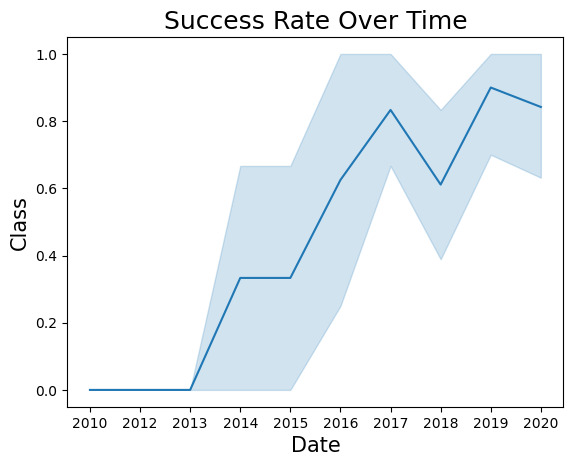

In [35]:
sns.lineplot(x="Date", y="Class", data=df)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Class", fontsize=15)
plt.title("Success Rate Over Time", fontsize=18)
plt.show()

In [37]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [38]:
df_dummies = pd.get_dummies(df, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
print(df_dummies)

    FlightNumber  Date BoosterVersion   PayloadMass      Outcome  Flights  \
0              1  2010       Falcon 9   6104.959412    None None        1   
1              2  2012       Falcon 9    525.000000    None None        1   
2              3  2013       Falcon 9    677.000000    None None        1   
3              4  2013       Falcon 9    500.000000  False Ocean        1   
4              5  2013       Falcon 9   3170.000000    None None        1   
..           ...   ...            ...           ...          ...      ...   
85            86  2020       Falcon 9  15400.000000    True ASDS        2   
86            87  2020       Falcon 9  15400.000000    True ASDS        3   
87            88  2020       Falcon 9  15400.000000    True ASDS        6   
88            89  2020       Falcon 9  15400.000000    True ASDS        3   
89            90  2020       Falcon 9   3681.000000    True ASDS        1   

    GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0   

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(sparse_output=False)

In [41]:
encoded_features = encoder.fit_transform(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])

In [42]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Orbit', 'LaunchSite', 'LandingPad', 'Serial']))
features_one_hot = pd.concat([features, encoded_df], axis=1)

In [53]:
print(encoded_df.columns)

Index(['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'LandingPad_nan', 'Serial_B0003',
       'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004',
       'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008',
       'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013',
       'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018',
       'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022',
       'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028',
       'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B103

In [43]:
print(features_one_hot.head())

   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ...  Serial_B1048 Serial_B1049  Serial_B1050  \
0  False        NaN    1.0  ...           0.0          0.0           0.0   
1  False        NaN    1.0  ...           0.0          0.0           0.0   
2  False        NaN    1.0  ...           0.0          0.0           0.0   
3  False        NaN    1.0  ...           0.0          0.0           0.0   
4  False        NaN    1.0  ...           0.0          0.0           0.0   

   Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  Serial_B1